In [230]:
import numpy as np
import pandas as pd

import talib
from datetime import datetime

from binance.client import Client


In [231]:
client = Client('JLCON0ZJ9v4zX595o2W1rlvSIhIercTu2ugNLCMPZ88QAt8zvSe2vY3LDiiRjKMB','JMnozKSUlep8mBrXCW1b7mAdHDl5qcYv3GDfNOquyifCdbD4QmGXILR9A5V0FgKf')
start_str = 'Jan 1, 2022'
end_str = ''
coin = 'BTC'
klines = client.get_historical_klines(symbol=f'{coin}USDT', interval=client.KLINE_INTERVAL_1DAY, start_str=start_str)  ##craw dữ liệu
df = pd.DataFrame(klines)
df = df.iloc[:,:6] ## Chỉ lấy 6 cột đầu.
df.columns = ['time','open','high','low','close','volume']
df = df.astype(float) ## Dữ liệu đang ở dạng string nên cần chuyển qua float.
df['time'] = [datetime.fromtimestamp(ts / 1000) for ts in df['time']] ##chuyển định dạng timestamp sang thời gian chuẩn YY/MM/DD 00:00 UTC
df1 = df
df2 = df
df.tail()

,time,open,high,low,close,volume
337,2022-12-04 07:00:00,16885.20,17202.84,16878.25,17105.70,178619.13387
338,2022-12-05 07:00:00,17106.65,17424.25,16867.00,16966.35,233703.29225
339,2022-12-06 07:00:00,16966.35,17107.01,16906.37,17088.96,218730.76883
340,2022-12-07 07:00:00,17088.96,17142.21,16678.83,16836.64,220657.41334
341,2022-12-08 07:00:00,16836.64,16890.01,16777.00,16821.72,82197.33155


In [232]:
open = df1['open']
high = df['high']
low  = df['low']
close = df['close']
volume = df['volume']
df.dropna()
avg = (df['high'] + df['low']) / 2
diff = (df['high'] - df['low'])
##Overlap Studies
df['BBANDS_upperband'], df['BBANDS_middleband'], df['BBANDS_lowerband'] = talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
df['BBANDS_upperband'] = (df['BBANDS_upperband'] - avg) / close
df['BBANDS_middleband'] = (df['BBANDS_middleband'] - avg) / close
df['BBANDS_lowerband'] = (df['BBANDS_lowerband'] - avg) / close
df['DEMA'] = (talib.DEMA(close, timeperiod=30) - avg) / close
df['EMA'] = (talib.EMA(close, timeperiod=30) - avg) / close
df['HT_TRENDLINE'] = (talib.HT_TRENDLINE(close) - avg) / close
df['KAMA'] = (talib.KAMA(close, timeperiod=30) - avg) / close
df['MA'] = (talib.MA(close, timeperiod=30, matype=0) - avg) / close
df['MIDPOINT'] = (talib.MIDPOINT(close, timeperiod=14) - avg) / close
df['SMA'] = (talib.SMA(close, timeperiod=30) - avg) / close
df['T3'] = (talib.T3(close, timeperiod=5, vfactor=0) - avg) / close
df['TEMA'] = (talib.TEMA(close, timeperiod=30) - avg) / close
df['TRIMA'] = (talib.TRIMA(close, timeperiod=30) - avg) / close
df['WMA'] = (talib.WMA(close, timeperiod=30) - avg) / close
df['LINEARREG'] = (talib.LINEARREG(close, timeperiod=14) - close) / close
df['LINEARREG_INTERCEPT'] = (talib.LINEARREG_INTERCEPT(close, timeperiod=14) - close) / close

df['AD'] = talib.AD(high, low, close, volume) / close
df['ADOSC'] = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10) / close
df['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0) / close
df['HT_PHASOR_inphase'], df['HT_PHASOR_quadrature'] = talib.HT_PHASOR(close)
df['HT_PHASOR_inphase'] /= close
df['HT_PHASOR_quadrature'] /= close
df['LINEARREG_SLOPE'] = talib.LINEARREG_SLOPE(close, timeperiod=14) / close
df['MACD_macd'], df['MACD_macdsignal'], df['MACD_macdhist'] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD_macd'] /= close
df['MACD_macdsignal'] /= close
df['MACD_macdhist'] /= close
df['MINUS_DM'] = talib.MINUS_DM(high, low, timeperiod=14) / close
df['MOM'] = talib.MOM(close, timeperiod=10) / close
df['OBV'] = talib.OBV(close, volume) / close
df['PLUS_DM'] = talib.PLUS_DM(high, low, timeperiod=14) / close
df['STDDEV'] = talib.STDDEV(close, timeperiod=5, nbdev=1) / close
df['TRANGE'] = talib.TRANGE(high, low, close) / close

##Momentum Indicators
df['ADX'] = talib.ADX(high, low, close, timeperiod=14)
df['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
df['AROON_aroondown'], df['AROON_aroonup'] = talib.AROON(high, low, timeperiod=14)
df['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
df['BOP'] = talib.BOP(open, high, low, close)
df['CCI'] = talib.CCI(high, low, close, timeperiod=14)
df['DX'] = talib.DX(high, low, close, timeperiod=14)

df['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
df['MINUS_DI'] = talib.MINUS_DI(high, low, close, timeperiod=14)
df['PLUS_DI'] = talib.PLUS_DI(high, low, close, timeperiod=14)
df['RSI'] = talib.RSI(close, timeperiod=14)
df['STOCH_slowk'], df['STOCH_slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df['STOCHF_fastk'], df['STOCHF_fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
df['STOCHRSI_fastk'], df['STOCHRSI_fastd'] = talib.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
df['TRIX'] = talib.TRIX(close, timeperiod=30)
df['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
df['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)

df['ATR'] = talib.ATR(high, low, close, timeperiod=14)  # Chỉ báo về biên động thị trường
df['NATR'] = talib.NATR(high, low, close, timeperiod=14)

df['HT_DCPERIOD'] = talib.HT_DCPERIOD(close)
df['HT_DCPHASE'] = talib.HT_DCPHASE(close)
df['HT_SINE_sine'], df['HT_SINE_leadsine'] = talib.HT_SINE(close)
df['HT_TRENDMODE'] = talib.HT_TRENDMODE(close)

df['BETA'] = talib.BETA(high, low, timeperiod=5)
df['CORREL'] = talib.CORREL(high, low, timeperiod=30)

df['LINEARREG_ANGLE'] = talib.LINEARREG_ANGLE(close, timeperiod=14)
diff =pd.DataFrame.median(diff)
print(diff)
## Pattern Recognition

1211.4150000000009


In [233]:
#Phân nhóm dữ liệu
pipdiff = diff  # for TP
SLTPRatio = 2   # pipdiff/Ratio gives SL


def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length

    for line in range(0, length - barsupfront - 2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1, barsupfront + 2):
            value1 = open[line + 1] - low[line + i]
            value2 = open[line + 1] - high[line + i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ((valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff / SLTPRatio))):
                trendcat[line] = 1  # -1 downtrend
                break
            elif ((valueOpenLow <= (pipdiff / SLTPRatio)) and (-valueOpenHigh >= pipdiff)):
                trendcat[line] = 2  # uptrend
                break
            else:
                trendcat[line] = 0  # no clear trend

    return trendcat
df['mytarget'] = mytarget(16, df)




In [234]:
df.to_csv('target.csv',index =False)

In [235]:
features = sorted([
    'ADX',
    'ADXR',
    'APO',
    'AROON_aroondown',
    'AROON_aroonup',
    'AROONOSC',
    'CCI',
    'DX',
    'MACD_macd',
    'MACD_macdsignal',
    'MACD_macdhist',
    'MFI',
    'MOM',
    'RSI',
    'STOCH_slowk',
    'STOCH_slowd',
    'STOCHF_fastk',

    'ULTOSC',
    'WILLR',

    'HT_DCPERIOD',
    'HT_DCPHASE',
    'HT_PHASOR_inphase',
    'HT_PHASOR_quadrature',
    'HT_TRENDMODE',
    'BETA',
    'LINEARREG',
    'LINEARREG_ANGLE',
    'LINEARREG_INTERCEPT',
    'LINEARREG_SLOPE',
    'STDDEV',
    'BBANDS_upperband',
    'BBANDS_middleband',
    'BBANDS_lowerband',
    'DEMA',
    'EMA',
    'HT_TRENDLINE',
    'KAMA',
    'MA',
    'MIDPOINT',
    'T3',
    'TEMA',
    'TRIMA',
    'WMA',
])
df = df.dropna()
X = df[features]
y = df["mytarget"]


In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [237]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))


****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 60.4167%


In [238]:
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

C:\Users\DAD\AppData\Local\Temp\ipykernel_16264\1226467017.py:3: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 29.1667%


In [239]:
import joblib

##Save Model
# filename = 'mymodel1.sav'
# joblib.dump(model, filename)

#load the model from disk
loaded_model = joblib.load('mymodel1.sav')

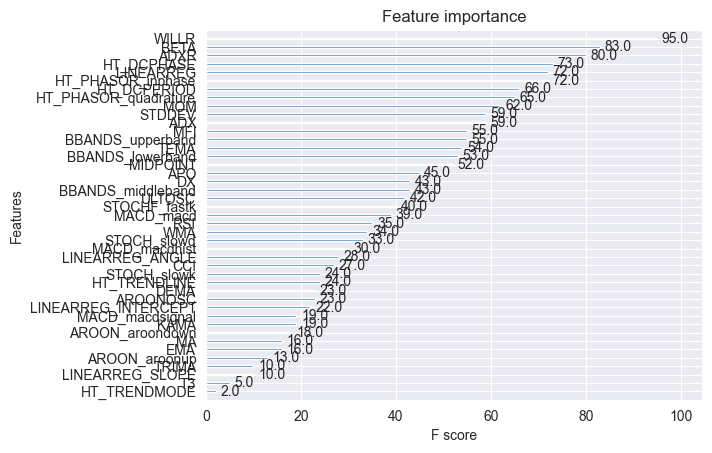

In [240]:
from matplotlib import pyplot
from xgboost import plot_importance
#plot feature importance
plot_importance(model)
pyplot.show()


In [241]:
import array as arr
## Pattern Recognition
open = df['open']
high = df['high']
low  = df['low']
close = df['close']
volume = df['volume']

pr =[]

df['2CROWS'] =  talib.CDL2CROWS(open,high,low,close)          #Two Crows
df['3BLACKCROWS'] = talib.CDL3BLACKCROWS(open,high,low,close)       #Three Black Crows
df[''] = talib.CDL3INSIDE(open,high,low,close)           #Three Inside Up/Down
talib.CDL3LINESTRIKE(open,high,low,close)       #Three-Line Strike
talib.CDL3OUTSIDE(open,high,low,close)          #Three Outside Up/Down
talib.CDL3STARSINSOUTH(open,high,low,close)     #Three Stars In The South
talib.CDL3WHITESOLDIERS(open,high,low,close)    #Three Advancing White Soldiers
talib.CDLABANDONEDBABY(open,high,low,close)     #Abandoned Baby
talib.CDLADVANCEBLOCK(open,high,low,close)      #Advance Block
talib.CDLBELTHOLD(open,high,low,close)          #Belt-hold
talib.CDLBREAKAWAY(open,high,low,close)         #Breakaway
talib.CDLCLOSINGMARUBOZU(open,high,low,close)   #Closing Marubozu
talib.CDLCONCEALBABYSWALL(open,high,low,close)  #Concealing Baby Swallow
talib.CDLCOUNTERATTACK(open,high,low,close)     #Counterattack
talib.CDLDARKCLOUDCOVER(open,high,low,close)    #Dark Cloud Cover
talib.CDLDOJI(open,high,low,close)              #Doji
talib.CDLDOJISTAR(open,high,low,close)          #Doji Star
talib.CDLDRAGONFLYDOJI(open,high,low,close)     #Dragonfly Doji
talib.CDLENGULFING(open,high,low,close)         #Engulfing Pattern
talib.CDLEVENINGDOJISTAR(open,high,low,close)   #Evening Doji Star
talib.CDLEVENINGSTAR(open,high,low,close)       #Evening Star
talib.CDLGAPSIDESIDEWHITE(open,high,low,close)  #Up/Down-gap side-by-side white lines
talib.CDLGRAVESTONEDOJI(open,high,low,close)    #Gravestone Doji
talib.CDLHAMMER(open,high,low,close)            #Hammer
talib.CDLHANGINGMAN(open,high,low,close)        #Hanging Man
talib.CDLHARAMI(open,high,low,close)            #Harami Pattern
talib.CDLHARAMICROSS(open,high,low,close)       #Harami Cross Pattern
talib.CDLHIGHWAVE(open,high,low,close)          #High-Wave Candle
talib.CDLHIKKAKE(open,high,low,close)           #Hikkake Pattern
talib.CDLHIKKAKEMOD(open,high,low,close)        #Modified Hikkake Pattern
talib.CDLHOMINGPIGEON(open,high,low,close)      #Homing Pigeon
talib.CDLIDENTICAL3CROWS(open,high,low,close)   #Identical Three Crows
talib.CDLINNECK(open,high,low,close)            #In-Neck Pattern
talib.CDLINVERTEDHAMMER(open,high,low,close)    #Inverted Hammer
talib.CDLKICKING(open,high,low,close)           #Kicking
talib.CDLKICKINGBYLENGTH(open,high,low,close)   #Kicking - bull/bear determined by the longer marubozu
talib.CDLLADDERBOTTOM(open,high,low,close)      #Ladder Bottom
talib.CDLLONGLEGGEDDOJI(open,high,low,close)    #Long Legged Doji
talib.CDLLONGLINE(open,high,low,close)          #Long Line Candle
talib.CDLMARUBOZU(open,high,low,close)          #Marubozu
talib.CDLMATCHINGLOW(open,high,low,close)       #Matching Low
talib.CDLMATHOLD(open,high,low,close)           #Mat Hold
talib.CDLMORNINGDOJISTAR(open,high,low,close)   #Morning Doji Star
talib.CDLMORNINGSTAR(open,high,low,close)       #Morning Star
talib.CDLONNECK(open,high,low,close)            #On-Neck Pattern
talib.CDLPIERCING(open,high,low,close)          #Piercing Pattern
talib.CDLRICKSHAWMAN(open,high,low,close)       #Rickshaw Man
talib.CDLRISEFALL3METHODS(open,high,low,close)  #Rising/Falling Three Methods
talib.CDLSEPARATINGLINES(open,high,low,close)   #Separating Lines
talib.CDLSHOOTINGSTAR(open,high,low,close)      #Shooting Star
talib.CDLSHORTLINE(open,high,low,close)         #Short Line Candle
talib.CDLSPINNINGTOP(open,high,low,close)       #Spinning Top
talib.CDLSTALLEDPATTERN(open,high,low,close)    #Stalled Pattern
talib.CDLSTICKSANDWICH(open,high,low,close)     #Stick Sandwich
talib.CDLTAKURI(open,high,low,close)            #Takuri (Dragonfly Doji with very long lower shadow)
talib.CDLTASUKIGAP(open,high,low,close)         #Tasuki Gap
talib.CDLTHRUSTING(open,high,low,close)         #Thrusting Pattern
talib.CDLTRISTAR(open,high,low,close)           #Tristar Pattern
talib.CDLUNIQUE3RIVER(open,high,low,close)      #Unique 3 River
talib.CDLUPSIDEGAP2CROWS(open,high,low,close)   #Upside Gap Two Crows
talib.CDLXSIDEGAP3METHODS(open,high,low,close)  #Upside/Downside Gap Three Methods

C:\Users\DAD\AppData\Local\Temp\ipykernel_16264\4174972494.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DAD\AppData\Local\Temp\ipykernel_16264\4174972494.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DAD\AppData\Local\Temp\ipykernel_16264\4174972494.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

88     0
89     0
90     0
91     0
92     0
      ..
319    0
320    0
321    0
322    0
323    0
Length: 236, dtype: int32

In [242]:
##BackTest :
class TradingEnv:
    def __init__(self, balance_amount, balance_unit, trading_fee_multiplier):
        self.balance_amount = balance_amount
        self.balance_unit = balance_unit
        self.buys = []
        self.sells = []
        self.trading_fee_multiplier = trading_fee_multiplier
    def buy(self, buy_price, time):
        self.balance_amount = (self.balance_amount / buy_price) * self.trading_fee_multiplier
        self.buys.append([ time, buy_price])

    def sell(self, sell_price, time):
        self.balance_amount = self.balance_amount * sell_price * self.trading_fee_multiplier
        self.sells.append( [self.balance_unit, time, sell_price] )
        self.balance_unit = 'USDT'



In [243]:
from plot_chart import plot_results
# VIP level 0, paying fees with BNB = 0.075%
env = TradingEnv(balance_amount=100,balance_unit='USDT', trading_fee_multiplier=0.99925)
balance = 100.00
tokenunit = 0.00
buy = True
buys =[]
sells = []


for i in range(len(df)) :
    X_stream  = df.iloc[[i]]
    X_model = X_stream[features]
    ModelPrediction = loaded_model.predict(X_model)
    #Buy Signal
    if ModelPrediction == 2 and buy == True :
         tokenunit = balance/df['low'].iloc[i]
         buys.append([df['time'].iloc[i],df['low'].iloc[i]])


         print(tokenunit)
         buy = False
    if ModelPrediction == 1 and buy == False :
        balance = tokenunit*df['high'].iloc[i]
        sells.append([df['time'].iloc[i],df['high'].iloc[i]])
        tokenunit=0
        print(balance)
        buy = True

# print(f'num buys: {len(env.buys)}')
# print(f'num sells: {len(env.sells)}')
# print(f'ending balance: {env.balance_amount} {env.balance_unit}')
# plot_results(df,env.buys, env.sells)
# b.to_csv('his.csv',index=False)
# print(len(buys))
# print(balance)
for i in range(len(sells)) :
    

0.0023738601910292772
96.3684449411615
0.0024754530083047686
97.71781437598843
0.0025132258349548466
77.15351990727883
0.0026167040836791193
80.33281536894896
0.003970582017049672
85.59943506218382
0.004510691360872119
97.81226724248592
0.004532639122172479
104.2541899420911
0.0046840763503903735
113.33038416395202
0.004787686657635391
104.37156913645151
0.005346904156580508
109.25660771198659
0.005591433352711698
113.9861775277113
0.006170995054360679
124.5615351722703
0.006567664414847626
131.0371866086659
0.006905715076677318
133.61053227483893
0.006512821461118154
109.0962722951902
0.006742662070160087
109.0962722951902


In [246]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                                      open=df['open'],
                                      high=df['high'],
                                      low=df['low'],
                                      close=df['close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
# fig.add_trace(go.Scatter(x=[buy[1] for buy in buys if buy[0] == 'BTC'],
#                          y=[buy[2] for buy in buys if buy[0] == 'BTC'],
#                          type='scatter',
#                          mode='markers',
#                          marker=dict(symbol='x',color='blue'),
#                          name='buys'))
#
# fig.add_trace(go.Scatter(x=[sell[1] for sell in sells if sell[0] == 'BTC'],
#                          y=[sell[2] for sell in sells if sell[0] == 'BTC'],
#                          type='scatter',
#                          mode='markers',
#                          marker=dict(symbol='x',color='orange'),
#                          name='sells'))

# fig.update_xaxes(range = [df['open'].iloc[0],df['open'].iloc[-1]])
# fig.update_yaxes(range = [min(df['low'])*.99,max(df['high'])*1.01])
fig.show()